In [10]:
import pandas as pd
import numpy as np

import pymc as pm

In [11]:
click_df = pd.read_csv("Data_ver2.csv")

click_df.head(100)

click_df['avgTime'].dropna(inplace=True)

In [12]:
# Create the features and response
X = click_df.loc[:, ['tab','list','par','pic']]
y = click_df.loc[:, 'avgTime']

In [13]:
with pm.Model() as linear_model2:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0, sigma = 10)

    # Slope
    slopeTab = pm.Normal('slopeTab', mu = 0, sigma = 10)
    slopeList = pm.Normal('slopeList', mu = 0, sigma = 10)
    slopePar = pm.Normal('slopePar', mu = 0, sigma = 10)
    slopePic = pm.Normal('slopePic', mu = 0, sigma = 10)

    # Standard deviation
    sigma = pm.HalfNormal('sigma', sigma = 10)

    # Estimate of mean
    mean = intercept + slopeTab * X.loc[:, 'tab'] + slopeList * X.loc[:, 'list'] + slopePar * X.loc[:, 'par'] + slopePic * X.loc[:, 'pic']

    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sigma = sigma, observed = y.values)

    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(draws=1000, step=step)

C:\Users\Francis\anaconda3\envs\pymc_env\Lib\site-packages\pymc\model\core.py:1317: ImputationWarning: Data in Y_obs contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, slopeTab, slopeList, slopePar, slopePic, sigma, Y_obs_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.


C:\Users\Francis\anaconda3\envs\pymc_env\Lib\site-packages\arviz\plots\plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (141) in plot_posterior, generating only 40 plots
  warnings.warn(
C:\Users\Francis\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'slopeTab'}>,
        <Axes: title={'center': 'slopeList'}>,
        <Axes: title={'center': 'slopePar'}>],
       [<Axes: title={'center': 'slopePic'}>,
        <Axes: title={'center': 'Y_obs_unobserved\n0'}>,
        <Axes: title={'center': 'Y_obs_unobserved\n1'}>,
        <Axes: title={'center': 'Y_obs_unobserved\n2'}>],
       [<Axes: title={'center': 'Y_obs_unobserved\n3'}>,
        <Axes: title={'center': 'Y_obs_unobserved\n4'}>,
        <Axes: title={'center': 'Y_obs_unobserved\n5'}>,
        <Axes: title={'center': 'Y_obs_unobserved\n6'}>],
       [<Axes: title={'center': 'Y_obs_unobserved\n7'}>,
        <Axes: title={'center': 'Y_obs_unobserved\n8'}>,
        <Axes: title={'center': 'Y_obs_unobserved\n9'}>,
        <Axes: title={'center': 'Y_obs_unobserved\n10'}>],
       [<Axes: title={'center': 'Y_obs_unobserved\n11'}>,
        <Axes: title={'center': 'Y_obs_unobserved\n12'}>,
        <Axes: title

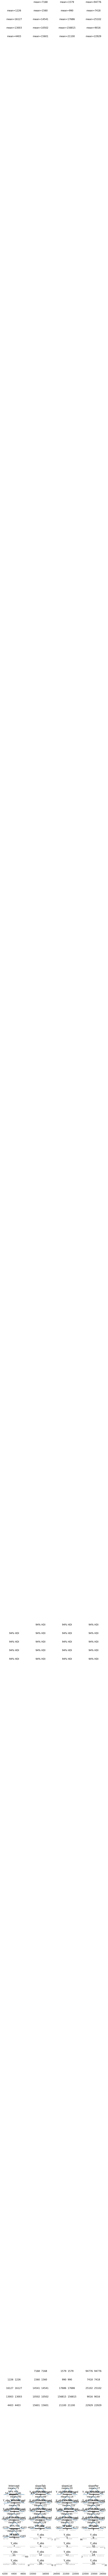

In [14]:
pm.plot_posterior(linear_trace, figsize = (12, 10))